In [1]:
import os 
from pathlib import Path 
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Lab Assignment Two: Exploring Image Data 

## CS 7324 Fall 2023
## Catherine Magee, Morgan Mote, Luv Patel

## Buisness Understanding 

 [2 points] Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). What is the prediction task for your dataset and which third parties would be interested in the results? Why is this data important? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties? Be specific and use your own words to describe the aspects of the data. 

# Data Preparation


## Loading the Dataset: Pokemon Generation One
https://www.kaggle.com/datasets/thedagger/pokemon-generation-one

In [2]:
p = Path("/Users/Catherine/Desktop/dataset")

# Regular expression that pulls all the directories (folders in that path)
dirs = p.glob("*")

# prints all the pokemon data folders we will testing


In [3]:
# Dictionaries used 

labels_dict = {'Zapdos': 0, 'Kadabra': 1, 'Omanyte': 2, 'Shellder': 3, 'Bellsprout': 4, 'Eevee': 5, 'Jolteon': 6, 
               'Hypno': 7, 'Seel': 8, 'Zubat': 9, 'Graveler': 10, 'Magneton': 11, 'Abra': 12, 'Kingler': 13, 
               'Alakazam': 14, 'Clefable': 15, 'Gyarados': 16, '.DS_Store': 17, 'Poliwag': 18, 'Rapidash': 19, 
               'Machamp': 20, 'Pinsir': 21, 'Muk': 22, 'Seaking': 23, 'Magikarp': 24, 'Goldeen': 25, 'Venusaur': 26, 
               'Flareon': 27, 'Jigglypuff': 28, 'Doduo': 29, 'Weedle': 30, 'Vileplume': 31, 'Arcanine': 32, 
               'Tentacruel': 33, 'Gloom': 34, 'Charmeleon': 35, 'Articuno': 36, 'Sandshrew': 37, 'Spearow': 38, 
               'Marowak': 39, 'Clefairy': 40, 'dataset': 41, 'Snorlax': 42, 'Scyther': 43, 'Primeape': 44, 
               'Diglett': 45, 'Onix': 46, 'Mankey': 47, 'Rattata': 48, 'Voltorb': 49, 'Gengar': 50, 'Gastly': 51, 
               'Cloyster': 52, 'Weepinbell': 53, 'Dragonair': 54, 'Squirtle': 55, 'Pikachu': 56, 'Victreebel': 57, 
               'Charmander': 58, 'Staryu': 59, 'Venonat': 60, 'Vaporeon': 61, 'Ivysaur': 62, 'Krabby': 63, 
               'Drowzee': 64, 'Sandslash': 65, 'Kangaskhan': 66, 'Chansey': 67, 'Butterfree': 68, 'Starmie': 69,
               'Magmar': 70, 'Beedrill': 71, 'Ninetales': 72, 'Magnemite': 73, 'Metapod': 74, 'Electrode': 75, 
               'Raichu': 76, 'Fearow': 77, 'Mewtwo': 78, 'Kabuto': 79, 'Pidgeotto': 80, 'Hitmonchan': 81, 
               'Blastoise': 82, 'Weezing': 83, 'Golbat': 84, 'Seadra': 85, 'Rhyhorn': 86, 'Moltres': 87, 
               'Golduck': 88, 'Kabutops': 89, 'Aerodactyl': 90, 'Haunter': 91, 'Machop': 92, 'Koffing': 93, 
               'Pidgeot': 94, 'Wigglytuff': 95, 'Porygon': 96, 'Vulpix': 97, 'Dugtrio': 98, 'Ditto': 99, 
               'Raticate': 100, 'Geodude': 101, 'Tentacool': 102, 'Horsea': 103, 'Oddish': 104, 'Machoke': 105, 
               'Lapras': 106, 'Poliwrath': 107, 'Omastar': 108, 'Slowpoke': 109, 'Bulbasaur': 110, 'Growlithe': 111, 
               'Ponyta': 112, 'Parasect': 113, 'Dodrio': 114, 'Meowth': 115, 'Exeggutor': 116, 'Persian': 117, 
               'Psyduck': 118, 'Tauros': 119, 'Pidgey': 120, 'Electabuzz': 121, 'Dewgong': 122, 'Wartortle': 123, 
               'Nidoking': 124, 'Grimer': 125, 'Ekans': 126, 'Caterpie': 127, 'Tangela': 128, 'Kakuna': 129, 
               'Golem': 130, 'Slowbro': 131, 'MrMime': 132, 'Jynx': 133, 'Mew': 134, 'Paras': 135, 'Hitmonlee': 136,
               'Exeggcute': 137, 'Arbok': 138, 'Venomoth': 139, 'Dratini': 140, 'Cubone': 141, 'Rhydon': 142,
               'Dragonite': 143, 'Nidorino': 144, 'Lickitung': 145, 'Nidorina': 146, 'Charizard': 147, 
               'Poliwhirl': 148, 'Nidoqueen': 149, 'Farfetchd': 150}

dict_label = {0: 'Zapdos', 1: 'Kadabra', 2: 'Omanyte', 3: 'Shellder', 4: 'Bellsprout', 5: 'Eevee', 6: 'Jolteon', 
               7: 'Hypno', 8: 'Seel', 9: 'Zubat', 10: 'Graveler', 11: 'Magneton', 12: 'Abra', 13: 'Kingler', 14: 
               'Alakazam', 15: 'Clefable', 16: 'Gyarados', 17: '.DS_Store', 18: 'Poliwag', 19: 'Rapidash', 
               20: 'Machamp', 21: 'Pinsir', 22: 'Muk', 23: 'Seaking', 24: 'Magikarp', 25: 'Goldeen', 26: 'Venusaur', 
               27: 'Flareon', 28: 'Jigglypuff', 29: 'Doduo', 30: 'Weedle', 31: 'Vileplume', 32: 'Arcanine', 
               33: 'Tentacruel', 34: 'Gloom', 35: 'Charmeleon', 36: 'Articuno', 37: 'Sandshrew', 38: 'Spearow', 
               39: 'Marowak', 40: 'Clefairy', 41: 'dataset', 42: 'Snorlax', 43: 'Scyther', 44: 'Primeape', 
               45: 'Diglett', 46: 'Onix', 47: 'Mankey', 48: 'Rattata', 49: 'Voltorb', 50: 'Gengar', 
               51: 'Gastly', 52: 'Cloyster', 53: 'Weepinbell', 54: 'Dragonair', 55: 'Squirtle', 
               56: 'Pikachu', 57: 'Victreebel', 58: 'Charmander', 59: 'Staryu', 60: 'Venonat', 
               61: 'Vaporeon', 62: 'Ivysaur', 63: 'Krabby', 64: 'Drowzee', 65: 'Sandslash', 
               66: 'Kangaskhan', 67: 'Chansey', 68: 'Butterfree', 69: 'Starmie', 70: 'Magmar', 
               71: 'Beedrill', 72: 'Ninetales', 73: 'Magnemite', 74: 'Metapod', 75: 'Electrode', 
               76: 'Raichu', 77: 'Fearow', 78: 'Mewtwo', 79: 'Kabuto', 80: 'Pidgeotto', 81: 'Hitmonchan', 
               82: 'Blastoise', 83: 'Weezing', 84: 'Golbat', 85: 'Seadra', 86: 'Rhyhorn', 87: 'Moltres', 
               88: 'Golduck', 89: 'Kabutops', 90: 'Aerodactyl', 91: 'Haunter', 92: 'Machop', 93: 'Koffing', 
               94: 'Pidgeot', 95: 'Wigglytuff', 96: 'Porygon', 97: 'Vulpix', 98: 'Dugtrio', 99: 'Ditto', 
               100: 'Raticate', 101: 'Geodude', 102: 'Tentacool', 103: 'Horsea', 104: 'Oddish', 105: 'Machoke', 
               106: 'Lapras', 107: 'Poliwrath', 108: 'Omastar', 109: 'Slowpoke', 110: 'Bulbasaur', 111: 'Growlithe', 
               112: 'Ponyta', 113: 'Parasect', 114: 'Dodrio', 115: 'Meowth', 116: 'Exeggutor', 117: 'Persian', 
               118: 'Psyduck', 119: 'Tauros', 120: 'Pidgey', 121: 'Electabuzz', 122: 'Dewgong', 123: 'Wartortle',
               124: 'Nidoking', 125: 'Grimer', 126: 'Ekans', 127: 'Caterpie', 128: 'Tangela', 129: 'Kakuna',
               130: 'Golem', 131: 'Slowbro', 132: 'MrMime', 133: 'Jynx', 134: 'Mew', 135: 'Paras', 136: 'Hitmonlee', 
               137: 'Exeggcute', 138: 'Arbok', 139: 'Venomoth', 140: 'Dratini', 141: 'Cubone', 142: 'Rhydon', 
               143: 'Dragonite', 144: 'Nidorino', 145: 'Lickitung', 146: 'Nidorina', 147: 'Charizard', 
               148: 'Poliwhirl', 149: 'Nidoqueen', 150: 'Farfetchd'}


# Used the below to make the dictionaries I was just too lazy to type all the key value pairs 
#count = 0 

#for folder_dir in dirs:
   
    #temp = str(folder_dir)
    #temp = temp.split("/")
    #label = (temp[-1])
    
    #dict_label[count] = label
    #count = count +1

#print(dict_label)

## Linearize the Dataset 

In [4]:
image_data = []
labels = []


for folder_dir in dirs: 
    temp = str(folder_dir)
    temp = temp.split("/")
    label = (temp[-1])
    
    cnt = 0 
    
    for image_path in folder_dir.glob("*.jpg"):
        image = load_img(image_path,target_size=(100,100))
        image_arr = img_to_array(image)
        image_data.append(image_arr)
        labels.append(labels_dict[label])
        
        
        cnt += 1
    



## Calculation on our Dataset

In [5]:
import numpy as np

# the num of images
print(len(image_data))

# The different pokemon have different labels
print(len(labels))

10118
10118


In [19]:
X = np.array(image_data)
y = np.array(labels)

# 10118: images, height, weight: 100, channels: 3 (because it is a colored photo (red, green, blue))
image_amt, height, weight, channels = X.shape

print(X.shape)
print(y.shape)

print("number of samples: " + str(image_amt))
print("height of images: " + str(height))
print("weight of images: " + str(weight))
print("number channels (RBG)" + str(channels))

(10118, 100, 100, 3)
(10118,)
number of samples: 10118
height of images: 100
weight of images: 100
number channels (RBG)3


## Visualize the loaded dataset

In [15]:
# draw pokemon!
def drawImg(img, label):
    plt.title(dict_label[label])
    plt.imshow(img)
    plt.show()


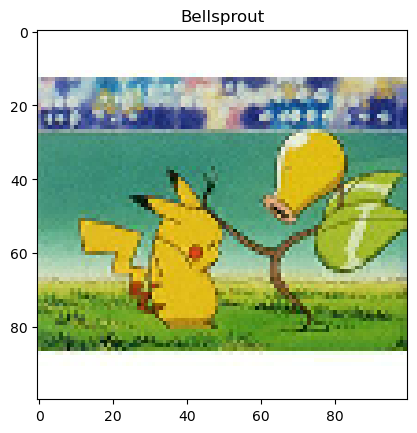

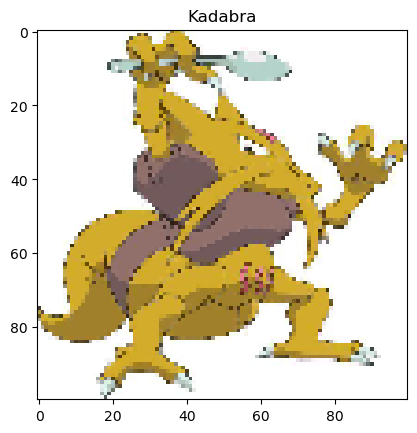

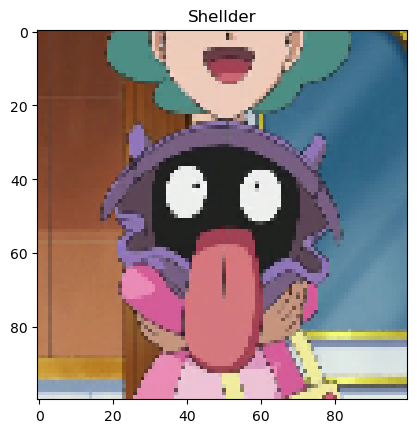

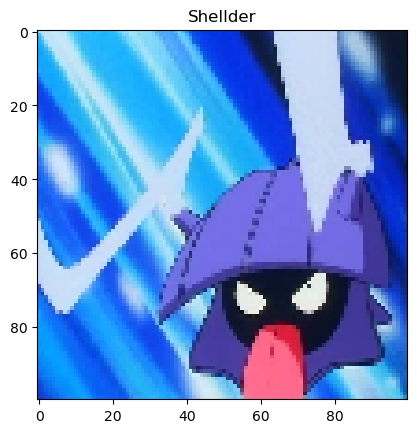

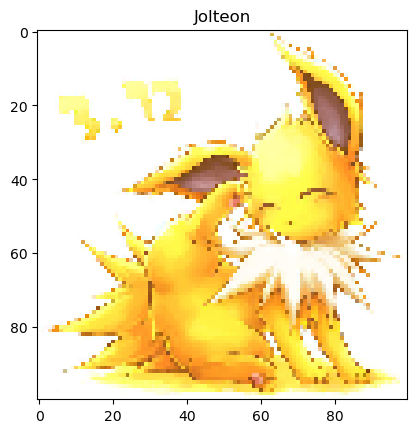

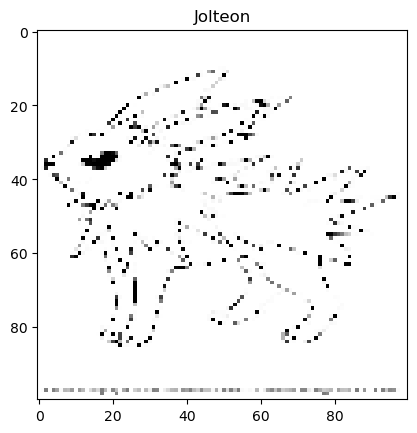

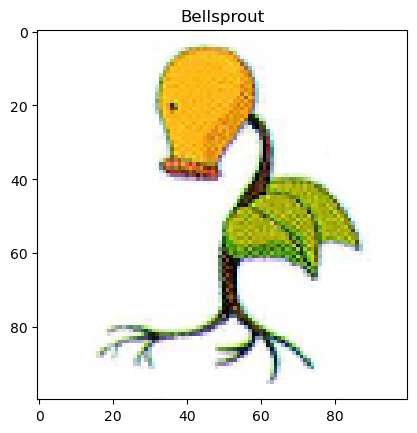

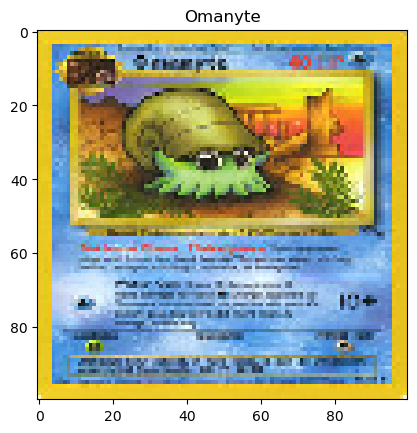

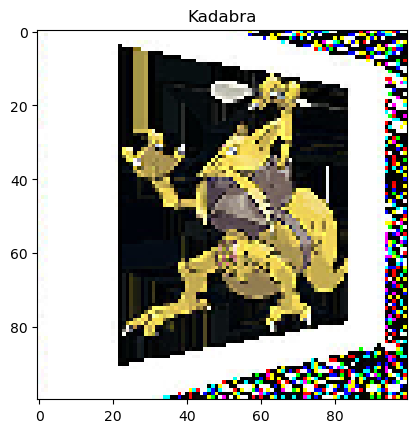

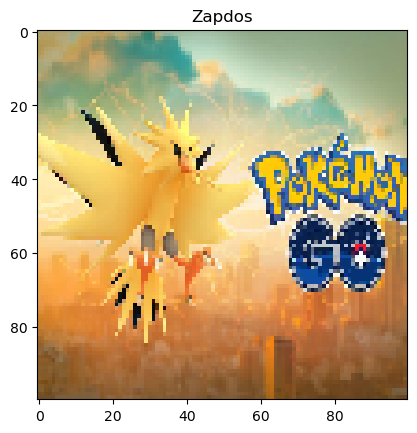

In [17]:
# draws 10 random pokemon with their labels 

for i in range(10):
    rand_idx = np.random.randint(400)
    drawImg(X[rand_idx]/255, y[rand_idx])

## Data Reduction (6 points total)

[.5 points] Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.
[.5 points] Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.
[2 points]  Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?
[1 points] Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).
[2 points] Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.  

 ## Exceptional Work (1 points total)
 
 You have free reign to provide any additional analyses. 
One idea (required for 7000 level students): Perform feature extraction upon the images using DAISY. Rather than using matching on the images with the total DAISY vector, you will instead use key point matching. You will need to investigate appropriate methods for key point matching using DAISY. NOTE: this often requires some type of brute force matching per pair of images, which can be computationally expensive.